
<h1><center> The MSEIR Model</h1>

<h4><center> Laura Gutierrez Funderburk $\mid$ 301245706 $\mid$ lgutierr@sfu.ca </h4>

<h4><center>  MATH302 $\mid$ FALL 2017 $\mid$ SIMON FRASER UNIVERSITY </h4>

## Abstract

In this notebook, we explore the MSEIR model. We introduce adequate notation, define a system of differential equations, deduce its system of difference equations, define an adequate domain, as well as explore equilibrium and threshold conditions. We will then take an existing Python script $^{[2]}$ written by Brandon Elford for the SIR model, extend it for the MSEIR model and run the modified script on a chickenpox outbreak. We comment on our findings. 


## 1. Introduction

Understanding epidemics is important, as it allow us to better understand when to intervene or let diseases run their natural course. A number of models have been proposed, such as the SIR continuos epidemic and endemic models, as well as the SI model. In these models, we assumed the population $N$ was constant, but it has been argued $^{[1]}$ that models assuming constant population result unsuitable in the event natural births and deaths are not balanced or when deaths resulting from disease are significant. 

In this notebook we will study a model with population whose size exponentially, also known as the MSEIR Model with Exponentially Changing Size. 

## 2. Mathematical Characterization of the Model

### 2.1 Characterizing the model

Let $M, S, E, I, R$ represent, respectively: maternal immunity (also referred to as passively immune class) class, susceptible class, exposed class (individuals who are infected but not infectious), infected class and removed class. We can then depict the transfer diagram for the MSEIR model as follows


<h4><center> Fig 1 Transfer diagram for the MSEIR model with the passively immune class M, the susceptible class S, the exposed class E, the infective class I, and the recovered class R. $^{[1]}$ </h4>
---

<img src="MSEIR_Pic.jpg" >

---



### 2.2 Notation

We start off by defining the following constants and variables. Let $b,d$ be constants representing, respectively,  birth rate and death rate. We define $q$ as 

$$q = b - d$$

Let $t \in \mathbb{R}$. We then consider the size of the population and number of individuals in each class as functions of time $t$:

<h4><center> Table 1: function definition</h4>

constant\variable| meaning           
---------|-------------------------------------|
$N(t)$   | total population size at time $t$   | 
$M(t)$   | individuals in class M at time $t$  |
$S(t)$   | individuals in class S at time $t$  |
$E(t)$   | individuals in class E at time $t$  |
$I(t)$   | individuals in class I at time $t$  |
$R(t)$   | individuals in class R at time $t$  |


Where $N$ satisfies 

$$(1) \begin{cases} N(t) = M(t) + S(t) + E(t) + I(t) + R(t)\end{cases} $$.

Furthermore, we assume $\dfrac{dN(t)}{dt} = (b - d) N(t)$. 

For each function $M(t),S(t),E(t),I(t),R(t)$ and assuming $N(t) \neq 0, \forall t$ in the domain, we define the densities of each class as

$$(2) \begin{cases} m(t) = \dfrac{M(t)}{N(t)} \\ s(t) = \dfrac{S(t)}{N(t)} \\ e(t) = \dfrac{E(t)}{N(t)} \\ i(t) = \dfrac{I(t)}{N(t)} \\ r(t) = \dfrac{R(t)}{N(t)} \end{cases} $$

From now on we will refer to $M(t), S(t), E(t), I(t), R(t),N(t)$ simply as $M,S,E,I,R,N$, and $m(t), s(t), e(t), i(t), r(t)$ as $m,s,e,i,r$.

We are now interested in expressing via mathematical equations, the number of individuals transferring from one class to another, as well as the number of individuals in each class who die and/or are born, as given in the  transfer diagram in Fig 1. We illustrate one example, and display the remaining cases in Table 2 (below). 

From Fig 1, when individuals in $M$ move to $S$, this results in a decrease in the number of individuals in class $M$ of size $- \delta M$, whereas this change results in an increase in the number of individuals in class $S$ of size $ + \delta M$. 

In general, when a given number of individuals leave a class, we will substract this number from the class they left. The same number of individuals will be added to the class the individuals transferred to. We will use this characterization on the number of individuals transferring more extensively once we define a system of differential equations. 

<h4><center> Table 2: Number of individuals moving throughout different classes </h4>

Transfer From| Represented By |Transfer into|Represented By |
-------------|----------------|-------------|---------------|
$M$ | $- \delta M$| $S$ | $+ \delta M$
$S$ | $- \lambda S$| $E$ | $+ \lambda S$
$E$ | $- \epsilon E$| $I$ | $+ \epsilon E$
$I$ | $- \gamma I$| $R$ | $+ \gamma I$


where $\lambda = \beta \dfrac{I}{N} = \beta i$  and $\beta$  is the average number of adequate contacts per person per unit time.

We are also interested in counting the number of individuals in each class who die, and the number of individuals in classes $M,S$ who are born. 

<h4><center> Table 3: Number of individuals who are born/die </h4>

Class   | Number of individuals who die|Number of individuals who are born|
--------|------------------------------|----------------------------------|
$M$| $-dM$ | $ + b(N - S)$
$S$| $-dS$ | $ + bS$
$E$| $-dE$ | 
$I$| $-dI$ |
$R$| $-dR$ |

For those who wonder why the number of newborns in class $M$ is not $bM$, recall that the total number of newborns is $bN$. If we let the total number of newborns from susceptible mothers be given by $bS$ and $x$ be the number of newborns from healthy mothers. We then obtain 

$$x + bS  = bN \Rightarrow x = bN - bS =  b(N - S)$$.

We will now the functions, constants and variables we defined above, to characterize the model using a system of differential equations. 

### 2.3 Defining System of Differential Equations

Recall that when we take the derivative $f(t)$, we obtain the rate of change of that function over time. We denote this as $\dfrac{df(t)}{dt}$. 

We will take the derivative for each class $M,S,E,I,R$ . With the assistance of our transfer diagram in Fig 1 in addition to the variables and constants we defined in Table 1, Table 2 and Table 3, we will define our system of ordinary differential equations as follows.

As an example, the rate of change for $M$ is given by a decrase in the number of individuals transferring from class $M$ to $S$, a decrease in the number of individuals in $M$ who died, and an increase in the number of individuals who were born from healthy mothers. The rate of change for $S,E,I,R$ are derived  similarly. With this we obtain the following system of differential equations:


$$(3) \begin{cases} \dfrac{dM}{dt} = b(N - S) - \delta M -  dM = b(N - S) - (\delta + d)M
 \\ \dfrac{dS}{dT} = bS + \delta M - (d + \lambda)S  \\ \dfrac{dE}{dt} = \beta S \dfrac{I}{N} - (\epsilon + d) E \\ \dfrac{dI}{dt} = \epsilon E - (\gamma + d)I \\ \dfrac{dR}{dt} = \gamma I - dR \\\dfrac{dN}{dt} = (b- d)N \end{cases}$$.
 
We will now derive a system of equations for the densities in (2).

We will derive them for the case $\dfrac{dm}{dt}$ as the remaining follow in a similar fashion.

If we assume $N \neq 0 \forall t$, dividing (1) by $N$ and using (2) we get

$$(4) \begin{cases} 1 = m + s + e + i + r \end{cases} \Rightarrow s = 1 - m - e - i - r$$. 
 
Furthermore, if we use $q = b - d \Rightarrow b = d + q$ and the assumption that $N$ is a function of time we apply cocient rule and obtain the following 

$$\dfrac{dm}{dt} = \dfrac{d \frac{M}{N}}{dt} = \dfrac{\dfrac{dM}{dt} \cdot N - M \cdot \dfrac{dN}{dt}}{N^2}$$

$$\dfrac{dm}{dt} = \dfrac{dM}{dt} \cdot \dfrac{1}{N} - \dfrac{M}{N} \cdot \dfrac{1}{N} \cdot \dfrac{dN}{dt}$$.

Using (3) and the assumption $\dfrac{dN(t)}{dt} = (b - d) N(t)$ we get

$$\dfrac{dm}{dt} = b(1 - s) - (\delta + d)m - m(b-d) \\ = (b)(m + e + i + r) - (\delta + d)m - (b - d)m \\ = (d+q)(e + i + r) - \delta m$$.

We apply a similar procedure for the cases $\dfrac{de}{dt}, \dfrac{di}{dt}, \dfrac{dr}{dt}$. The system of difference equations is given by (5):

$$ (5) \begin{cases} \dfrac{dm}{dt} = (d + q)(e + i + r) - \delta m \\ \dfrac{de}{dt} = \lambda (1 - m - e - i - r) - (\epsilon + d + q)e \\  \dfrac{di}{dt} = \epsilon e - (\gamma + d + q) i \\ \dfrac{dr}{dt} = \gamma i - (d + q) r \end{cases}$$.

We next define an adequate domain for this system of differential equations for the fractions. Given $s = 1 - m - e - i - r$, an appropriate domain would be

$$\mathbb{D} = \lbrace (m,e,i,r): m,e,i,r \geq 0, m + e + i + r \leq 1 \rbrace$$.

### 2.4 Equilibria and Threshold

We are next interested in defining the number of secondary cases derived from contact with a  member of the infective class during the infectious period, when every member of the population is in the susceptible class. We denote this number as $R_0$. 

Recall 

$$\dfrac{1}{\gamma}, \dfrac{1}{\epsilon}$$ 

denote, respectively, the mean infectious and the mean latent periods. The average infectious periods adjusted for population growth correspond to $\dfrac{1}{\gamma + d + q}$ while the number of exposed individuals who survive the latent class is givevn by $\dfrac{\epsilon}{\epsilon + d + q}$. Thus, the number of secondary cases is given by the product of $\beta$, the contact rate per unit time, the average infectious periods adjusted for population growth, and the number of exposed individuals who survive the latent class:

$$R_0  = \dfrac{\beta  \epsilon}{(\gamma + d + q) (\epsilon + d + q)}$$.

We want the values $m,s,e,i,r$ such that the rate of change for each equals zero, that is they either reach a minimum, maximum or saddle point. If we set each equation in (5) equal to zero we then find two equlibriums: 

$$m = e= i = r = 0 \Rightarrow s = 1$$

with a disease-free equlibrium. 

We also find a "unique endemic equilibrium $^{[1]}$" if we assume $R_0 >1$. Indeed, setting each equation in (5) to zero and substituting accordingly yields to the following

From the second equation in (5) and $\lambda = \beta i_{eq}$, we get

$$s_{eq} =  1 - m_{eq} - e_{eq} -i_{eq} - r_{eq} = \dfrac{1}{R_0}$$.

Furthermore,

$$r_{eq} = e_{eq} \left( \dfrac{\gamma \epsilon}{(d+q)(\gamma + d + q)} \right)\\ i_{eq} = e_{eq} \left( \dfrac{\epsilon}{\gamma + d + q} \right) \\ m_{eq} = e_{eq} \left( \dfrac{\epsilon + d + q}{\delta} \right)$$

We then notice that all are in terms of $e_{eq}$.

Replacing all values in the second equation in (5) yields to 

$$m_{eq} = \dfrac{d+q}{\delta + d + q} \left( 1 - \dfrac{1}{R_0} \right) \\ e_{eq} = \dfrac{\delta(d+q)}{(\delta + d + q)(\epsilon + d + q)} \left( 1 - \dfrac{1}{R_0} \right) \\ i_{eq} = \dfrac{\epsilon \delta (d+q)}{(\epsilon + d + q)(\delta + d +q)(\gamma + d + q)} \left( 1 - \dfrac{1}{R_0} \right) \\ r_{eq} = \dfrac{\epsilon \delta \gamma}{(\epsilon + d + q)(\delta + d +q)(\gamma + d + q)} \left( 1 - \dfrac{1}{R_0} \right)$$.

At endemic equilibrium the value $\lambda = \beta i_{eq}$ satisfies $\lambda = \dfrac{\delta (d+q)(R_0 - 1)}{(\delta + d + q)}$ so that there is a positive force of infection when $R_0 >1$.

###  Applying the MSEIR epidemiological model: chickenpox

We will now apply the model we described above to model a chickenpox epidemic. For chickenpox, the mean passively immune period, the mean latent period and the mean infectious period are, assuming births and deaths are ignored, respectively,

$$ \delta = \dfrac{1}{6}, \epsilon = \dfrac{1}{14}, \gamma = \dfrac{1}{7}$$ 

For a unique endemic equlibrium, i.e. when there is a positive force of infection, we assume $\beta > \dfrac{(\gamma + d + q)(\epsilon + d + q)}{\epsilon}$ . We assume in this exercise $\beta = 1 $ which corresponds to endemic equlibrium. 

We also set initial conditions a birth rate of $b = 1/50$ and a death rate of $d = 1/60$ with the following number of individuals at time $t=0$ in each class

$$I_0 = 500, R_0 = 100, M_0 = 100, E_0 = 100, N_0 = 1000, S_0 = N_0 - M_0 - I_0 - E_0 - R_0$$

In [1]:
%run -i MSEIR_model_functions_endemic.py

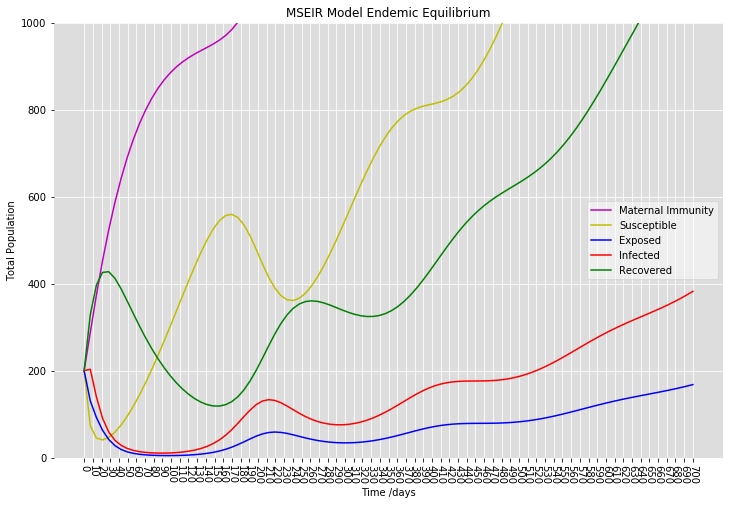

In [2]:
beta = 1
equilibrium_choice(beta,"MSEIR Model Endemic Equilibrium",ticlen )

We start with 200 indidivuals in each class, amounting to a total population of 1000. 

We see that, after 700 days, not only has the disease not died out, but it is growing exponentially. This is in accordance with our assumption that there is a positive force of infection. 

We are now going to plot the phase plane for the case of endemic equilibrium. 

In [3]:

#MSEIR values initial hypothetical values
M_0 = [100,30,30,2,0,0,0,0,0,0,10,20,30,40]
E_0 =[101,2,1,100,0,0,101,0,0,0,300,20,100,40]
I_0 = [500,100,200,300,400,500,600,700,800,900,1,1,1,1]
R_0 = [100,0,0,0,0,0,0,0,0,0,100,200,300,50]
N_0 = [1000,1000,1000,1000,1000,1000,1000,1000,10000,1000,1000,1000,1000,1000]


Mi, Si, Ei, Ii, Ri, Ni, start, end = phase_plane(M_0,E_0,I_0,R_0,N_0)

We will now plot the Phase Plane of I(t) and S(t). The Phase plane shows us all of the resulting situations for different initial conditions.

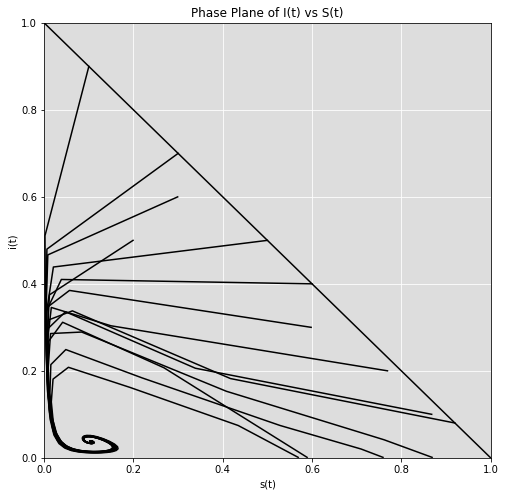

In [4]:
phase_plot(Si,Ii,Ni,start,end,"Phase Plane of I(t) vs S(t)")

This phase plane corresponds to the endemic equilibrium, each line represents the dynamics of the outbreak for each set of initial conditions in the arrays M_0,S_0,I_0,R_0,E_0. 

Since we assumed an initial Observe that, as the disease did not die out, but rather grew exponentially, we observe a spiral. 

We are next interested in modelling the case where we have disease-free equilibrium, and we choose $\beta=0.01$. 

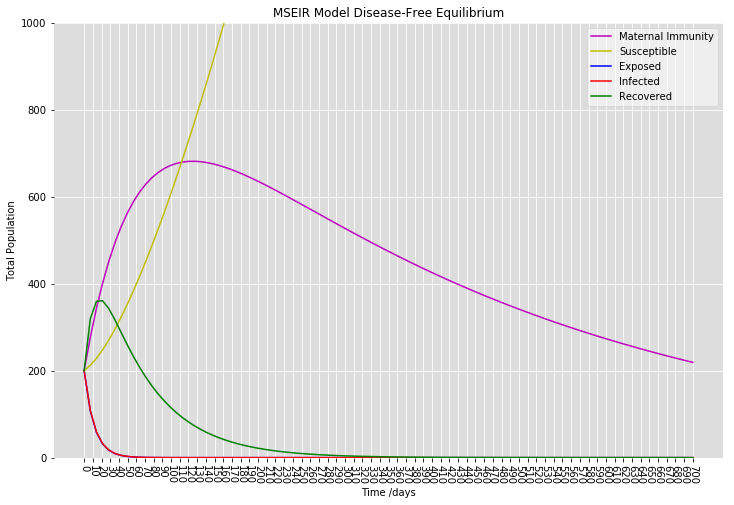

In [5]:
beta = 0.01
equilibrium_choice(beta,"MSEIR Model Disease-Free Equilibrium",ticlen)

The disease dies out approximately after 320 days. This is in accordance with our choice of $\beta$ leading to a disease-free equilibrium. 

All classes decrease over time with exception of the susceptible class, which grows exponentially. 

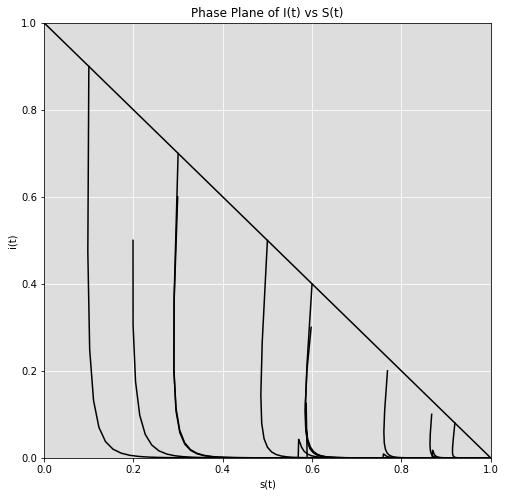

In [6]:
#MSEIR values initial hypothetical values
M_0 = [100,30,30,2,0,0,0,0,0,0,10,20,30,40]
E_0 =[101,2,1,100,0,0,101,0,0,0,300,20,100,40]
I_0 = [500,100,200,300,400,500,600,700,800,900,1,1,1,1]
R_0 = [100,0,0,0,0,0,0,0,0,0,100,200,300,50]
N_0 = [1000,1000,1000,1000,1000,1000,1000,1000,10000,1000,1000,1000,1000,1000]


Mi, Si, Ei, Ii, Ri, Ni, start, end = phase_plane(M_0,E_0,I_0,R_0,N_0)

phase_plot(Si,Ii,Ni,start,end,"Phase Plane of I(t) vs S(t)")

Note that in this case, there is no spiral as the disease died out. 

### References

$[1]$ The Mathematics of Infectious Diseases
Author(s): Herbert W. Hethcote
Source: SIAM Review, Vol. 42, No. 4 (Dec., 2000), pp. 599-653
Published by: Society for Industrial and Applied Mathematics
Stable URL: http://www.jstor.org/stable/2653135
Accessed: 23-10-2017 16:49 UTC 

$[2]$ IPython Notebook: Tutorial 2 - SIR+Model, Elford B.